In [2]:
import numpy as np

a = 1e5 / np.sqrt(1)
b = 129 ** (-0.75)
c = np.log10(np.log10(200) + 1)
a*b*c

1354.9761667120972

In [20]:
import numpy as np
import pandas as pd

data_dir = '/datadisk/kg/seti/input/'
train_df = pd.read_csv(data_dir + 'train_labels.csv')
# train_df.drop(columns=['Unnamed: 0'], inplace=True)
# train_df.to_csv('train_df.csv', index=False)
# train_df.to_csv('input/train_labels.csv', index=False)

In [21]:
train_df['negative'] = 0
train_df['positive'] = 0
train_df['other'] = 0
train_df

,id,target,file_path,fold,negative,positive,other
0,0000799a2b2c42d,0,/datadisk/kg/seti/input/train/0/0000799a2b2c42...,1,0,0,0
1,00042890562ff68,0,/datadisk/kg/seti/input/train/0/00042890562ff6...,0,0,0,0
2,0005364cdcb8e5b,0,/datadisk/kg/seti/input/train/0/0005364cdcb8e5...,0,0,0,0
3,0007a5a46901c56,0,/datadisk/kg/seti/input/train/0/0007a5a46901c5...,3,0,0,0
4,0009283e145448e,0,/datadisk/kg/seti/input/train/0/0009283e145448...,1,0,0,0
...,...,...,...,...,...,...,...
59995,fff8217fe05aba3,0,/datadisk/kg/seti/input/train/f/fff8217fe05aba...,1,0,0,0
59996,fffa939e610ed70,0,/datadisk/kg/seti/input/train/f/fffa939e610ed7...,0,0,0,0
59997,fffbb1c9c3d6c31,1,/datadisk/kg/seti/input/train/f/fffbb1c9c3d6c3...,4,0,0,0
59998,fffc9a763d23647,0,/datadisk/kg/seti/input/train/f/fffc9a763d2364...,2,0,0,0


In [32]:
temp_df = train_df[["negative", "positive", "other", "target"]]
for _, row in temp_df.iterrows():
    row[row['target']] = 1

In [33]:
train_df[["negative", "positive", "other", "target"]] = temp_df[["negative", "positive", "other", "target"]]
train_df

,id,target,file_path,fold,negative,positive,other
0,0000799a2b2c42d,0,/datadisk/kg/seti/input/train/0/0000799a2b2c42...,1,1,0,0
1,00042890562ff68,0,/datadisk/kg/seti/input/train/0/00042890562ff6...,0,1,0,0
2,0005364cdcb8e5b,0,/datadisk/kg/seti/input/train/0/0005364cdcb8e5...,0,1,0,0
3,0007a5a46901c56,0,/datadisk/kg/seti/input/train/0/0007a5a46901c5...,3,1,0,0
4,0009283e145448e,0,/datadisk/kg/seti/input/train/0/0009283e145448...,1,1,0,0
...,...,...,...,...,...,...,...
59995,fff8217fe05aba3,0,/datadisk/kg/seti/input/train/f/fff8217fe05aba...,1,1,0,0
59996,fffa939e610ed70,0,/datadisk/kg/seti/input/train/f/fffa939e610ed7...,0,1,0,0
59997,fffbb1c9c3d6c31,1,/datadisk/kg/seti/input/train/f/fffbb1c9c3d6c3...,4,0,1,0
59998,fffc9a763d23647,0,/datadisk/kg/seti/input/train/f/fffc9a763d2364...,2,1,0,0


In [34]:
train_df.to_csv('input/train_labels.csv', index=False)

In [5]:
def get_train_file_path(image_id):
    return f'/datadisk/kg/seti/input/train/{image_id[0]}/{image_id}.npy'
    
def get_test_file_path(image_id):
    return f'/datadisk/kg/seti/input/test/{image_id[0]}/{image_id}.npy'

train_df_bp = train_df.copy(deep=True)
train_df_bp

,id,target
0,0000799a2b2c42d,0
1,00042890562ff68,0
2,0005364cdcb8e5b,0
3,0007a5a46901c56,0
4,0009283e145448e,0
...,...,...
59995,fff8217fe05aba3,0
59996,fffa939e610ed70,0
59997,fffbb1c9c3d6c31,1
59998,fffc9a763d23647,0


In [6]:
train_df_bp['file_path'] = train_df['id'].apply(get_train_file_path)
train_df_bp.head(10)

,id,target,file_path
0,0000799a2b2c42d,0,/datadisk/kg/seti/input/train/0/0000799a2b2c42...
1,00042890562ff68,0,/datadisk/kg/seti/input/train/0/00042890562ff6...
2,0005364cdcb8e5b,0,/datadisk/kg/seti/input/train/0/0005364cdcb8e5...
3,0007a5a46901c56,0,/datadisk/kg/seti/input/train/0/0007a5a46901c5...
4,0009283e145448e,0,/datadisk/kg/seti/input/train/0/0009283e145448...
5,00096524e6670d6,0,/datadisk/kg/seti/input/train/0/00096524e6670d...
6,000cd479c2106d4,0,/datadisk/kg/seti/input/train/0/000cd479c2106d...
7,000e869ed875e40,0,/datadisk/kg/seti/input/train/0/000e869ed875e4...
8,00104dc954c2d30,0,/datadisk/kg/seti/input/train/0/00104dc954c2d3...
9,0010ad3ece01536,0,/datadisk/kg/seti/input/train/0/0010ad3ece0153...


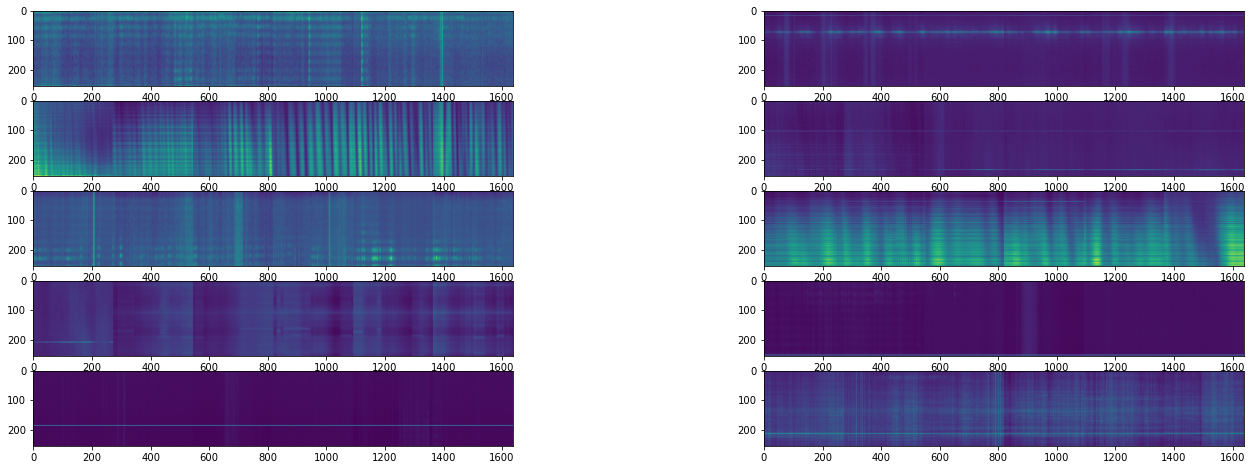

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 8))
for i in range(10):
    image = np.load(train_df_bp.loc[i, 'file_path'])
    image = image.astype(np.float32)
    image = np.vstack(image).transpose((1, 0))
    plt.subplot(5, 2, i+1)
    plt.imshow(image)
plt.show()

<AxesSubplot:>

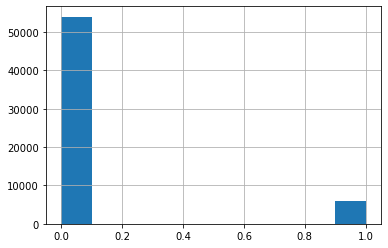

In [9]:
train_df_bp.target.hist()

In [12]:
train_df_bp.target.count()

60000

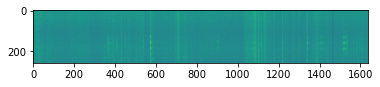

In [13]:
image = np.load(train_df_bp.loc[1138, 'file_path'])
image = image.astype(np.float32)
image = np.vstack(image).transpose((1, 0))
plt.imshow(image)

In [2]:
import pandas as pd

test_df = pd.read_csv('/datadisk/kg/seti/subs/submission.csv')
test_df.drop(columns=['file_path'], inplace=True)
test_df.to_csv('subs/submission.csv', index=False)

In [17]:
import numpy as np
import matplotlib.pyplot as plt

img_file_name = test_df[test_df.id == '00254afb7e880dc'].file_path.values[0]
image = np.load(img_file_name)
image = image.astype(np.float32)
image = np.vstack(image).transpose((1, 0))
plt.figure(figsize=(16, 8))
plt.imshow(image)

AttributeError: 'DataFrame' object has no attribute 'file_path'

In [23]:
print(image.max(), image.min())

7.265625 -2.8359375


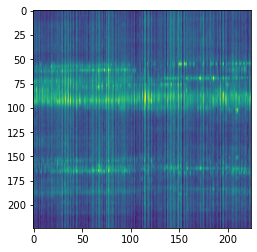

In [11]:
import cv2

img = cv2.resize(image, (224, 224))
plt.imshow(img)

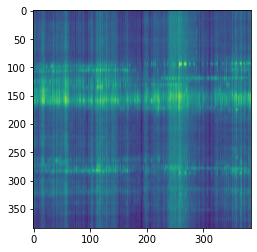

In [12]:
img = cv2.resize(image, (384, 384))
plt.imshow(img)

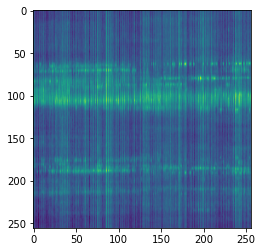

In [13]:
img = cv2.resize(image, (256, 256))
plt.imshow(img)

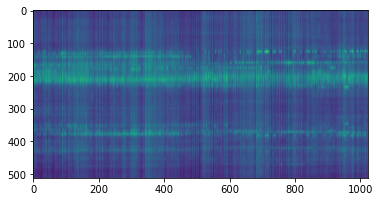

In [14]:
img = cv2.resize(image, (1024, 512))
plt.imshow(img)

In [18]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)
folds = folds.split(train_df_bp, train_df_bp.target)

for fold, (train_idx, val_idx) in enumerate(folds):
    train_df_bp.loc[val_idx, 'fold'] = int(fold)

train_df_bp['fold'] = train_df_bp['fold'].astype(int)
display(train_df_bp.groupby(['fold', 'target']).size())

fold  target
0     0         10800
      1          1200
1     0         10800
      1          1200
2     0         10800
      1          1200
3     0         10800
      1          1200
4     0         10800
      1          1200
dtype: int64

In [19]:
train_df_bp.head(19)

,id,target,file_path,fold
0,0000799a2b2c42d,0,/datadisk/kg/seti/input/train/0/0000799a2b2c42...,1
1,00042890562ff68,0,/datadisk/kg/seti/input/train/0/00042890562ff6...,0
2,0005364cdcb8e5b,0,/datadisk/kg/seti/input/train/0/0005364cdcb8e5...,0
3,0007a5a46901c56,0,/datadisk/kg/seti/input/train/0/0007a5a46901c5...,3
4,0009283e145448e,0,/datadisk/kg/seti/input/train/0/0009283e145448...,1
5,00096524e6670d6,0,/datadisk/kg/seti/input/train/0/00096524e6670d...,1
6,000cd479c2106d4,0,/datadisk/kg/seti/input/train/0/000cd479c2106d...,3
7,000e869ed875e40,0,/datadisk/kg/seti/input/train/0/000e869ed875e4...,4
8,00104dc954c2d30,0,/datadisk/kg/seti/input/train/0/00104dc954c2d3...,4
9,0010ad3ece01536,0,/datadisk/kg/seti/input/train/0/0010ad3ece0153...,4


In [20]:
train_df_bp.to_csv('train_df.csv')

In [14]:
import pandas as pd

df = pd.read_csv('submission.csv')
df.head(20)
df = df.drop(columns=['Unnamed: 0'])
df.to_csv('submission.csv', index=False)

In [1]:
import pandas as pd

df = pd.read_csv('input/submission.csv')
df.head(20)
df = df.drop(columns=['Unnamed: 0'])
df.to_csv('submission.csv', index=False)

In [5]:
import pandas as pd

df = pd.read_csv('subs/submission_b3_fold3.csv')
df_s = df.head(100)
df_s

,id,target
0,00034db451c4,0.001078
1,0006316b5ca0,0.004599
2,0006a953d21b,0.000590
3,0008a33d6695,0.006498
4,00095b5119fc,0.002017
...,...,...
95,00abedfe840c,1.000000
96,00b2015c1986,0.999962
97,00b390c0b75b,0.001347
98,00b520f952c3,0.000961


In [16]:

df_pos = df_s[df_s['target'] >= 0.9]
df_pos

,id,target
18,001d7eb3f9cb,0.999999
20,001ff76166aa,0.999959
27,002d5868b367,0.999907
35,003954c7e391,0.999995
37,003b5326af50,0.992032
56,005e0a2d415b,0.999978
57,005e68b19159,0.999907
58,005e6a127258,0.933922
60,0066c77058e7,0.999843
65,006f9d4f4dd4,0.999993


In [3]:
import pandas as pd

label_df = pd.read_csv('input/train_labels.csv')
label_df.drop(columns=['Unnamed: 0'], inplace=True)
label_df.to_csv('input/train_labels.csv', index=False)
label_df

,id,target,file_path,fold
0,00034abb3629,0,/datadisk/kg/seti/input/train/0/00034abb3629.npy,3
1,0004300a0b9b,0,/datadisk/kg/seti/input/train/0/0004300a0b9b.npy,0
2,000453852fda,0,/datadisk/kg/seti/input/train/0/000453852fda.npy,4
3,00047dfc96a9,0,/datadisk/kg/seti/input/train/0/00047dfc96a9.npy,0
4,0004be0baf70,0,/datadisk/kg/seti/input/train/0/0004be0baf70.npy,1
...,...,...,...,...
50160,fff395e32a1e,0,/datadisk/kg/seti/input/train/f/fff395e32a1e.npy,0
50161,fff66bbc51db,0,/datadisk/kg/seti/input/train/f/fff66bbc51db.npy,1
50162,fffaf1658eb7,0,/datadisk/kg/seti/input/train/f/fffaf1658eb7.npy,0
50163,fffb0fc8c613,0,/datadisk/kg/seti/input/train/f/fffb0fc8c613.npy,3


In [21]:
import timm

timm.list_models()

['adv_inception_v3',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'cspdarknet53',
 'cspdarknet53_iabn',
 'cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'cspresnext50',
 'cspresnext50_iabn',
 'darknet53',
 'densenet121',
 'densenet121d',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenet264',
 'densenet264d_iabn',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2next',
 'dla60x',
 'dla60x_c',
 'dla102',
 'dla102x',
 'dla102x2',
 'dla169',
 'dm_nfnet_f0',
 'dm_nfnet_f1',
 'dm_nfnet_f2',
 'dm_nfnet_f3',
 'dm_nfnet_f4',
 'dm_nfnet_f5',
 'dm_nfnet_f6',
 'dpn68',
 'dpn68b',
 'dpn92',
 'dpn98',
 'dpn107',
 'dpn131',
 'eca_nfnet_l0',
 'eca_nfnet_l1',
 'eca_vovnet39b',
 'ecaresnet26t'

In [ ]:
argvStr="--input=xxx.json,--output=yyy.yaml"



In [1]:
a = ((1, "aaa"), (2, "bbb"))
d = dict(a) # items 
d

{1: 'aaa', 2: 'bbb'}

In [2]:
d.items()

dict_items([(1, 'aaa'), (2, 'bbb')])

In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/datadisk/kg/seti/input/train_labels.csv')
test_df = pd.read_csv('/datadisk/kg/seti/input/sample_submission.csv')
test_df

,id,target
0,00034db451c4,0.5
1,0006316b5ca0,0.5
2,0006a953d21b,0.5
3,0008a33d6695,0.5
4,00095b5119fc,0.5
...,...,...
35842,ffeed3a168de,0.5
35843,fff177e32aac,0.5
35844,fff7d40b225a,0.5
35845,fff8238a709f,0.5


In [3]:
set(train_df.id.values) & set(test_df.id.values)

set()